<h1>Author: Iptihal Yousri Ibrahim</h1>
<h3>CodeAlpha Task_4 : Disease Prediction from Medical Data (Heart disease prediction)</h3>
<h4>Create a model to predict the likelihood of a disease based on medical data. Use datasets with labeled medical records and apply classification algorithms.</h4>

## Import Needed Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## EDA and Preprocessing

Read Data

In [2]:
df = pd.read_csv('Heart.csv')

Get first and last samples

In [3]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
df.tail(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
908,63,M,ASY,140,187,0,LVH,144,Y,4.0,Up,1
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


Get data information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


check null values

In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

check duplication

In [7]:
df.duplicated().any()

False

**Age column**

In [8]:
# Statistical summary
df['Age'].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

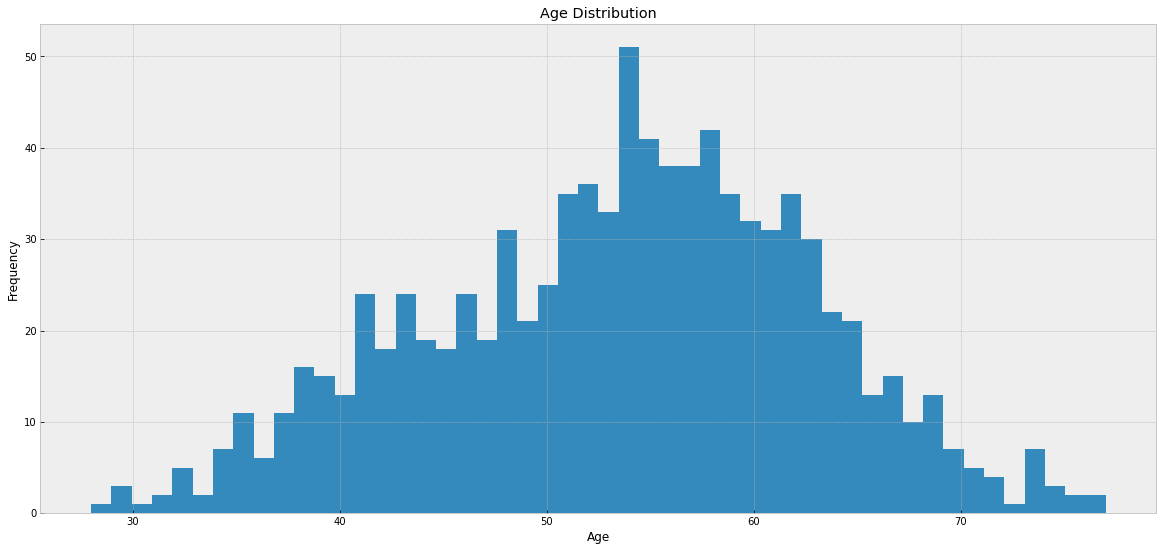

In [9]:
# Show age distribution
plt.style.use('bmh')
plt.figure(figsize=(20, 9))

plt.hist(df['Age'], bins=50)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

check outliers

<AxesSubplot:xlabel='Age'>

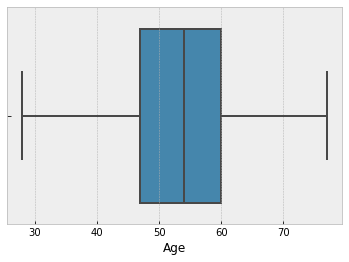

In [10]:
sns.boxplot(df['Age'])

**Sex Column**

In [11]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [12]:
# Encode Sex column 
from sklearn.preprocessing import LabelEncoder
LabelEncoderModel = LabelEncoder()
df['Sex'] = LabelEncoderModel.fit_transform(df['Sex'])

In [13]:
df['Sex'].value_counts()

1    725
0    193
Name: Sex, dtype: int64

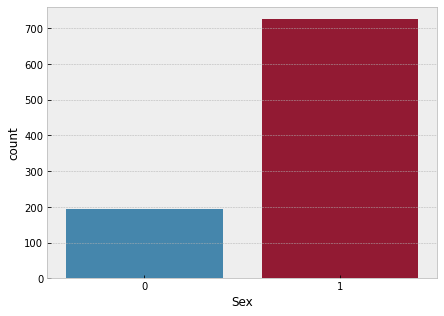

In [14]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Sex')
plt.show()

**ChestPainType Column**

In [15]:
ChestPainType = df['ChestPainType'].value_counts()
ChestPainType

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

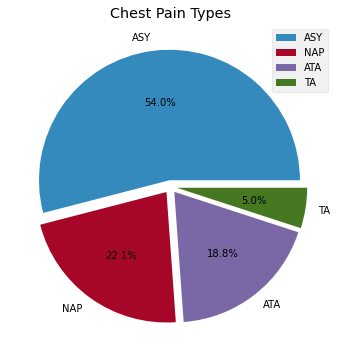

In [16]:
plt.figure(figsize=(6, 6))
plt.pie(ChestPainType, labels=['ASY', 'NAP', 'ATA', 'TA'],
                        autopct='%1.1f%%', shadow=False,
                        explode=[0.05, 0.05, 0.05, 0.05])
plt.title('Chest Pain Types')
plt.legend()
plt.show()

In [17]:
# Encode ChestPainType column
df['ChestPainType'] = LabelEncoderModel.fit_transform(df['ChestPainType'])

In [18]:
df['ChestPainType'].value_counts()

0    496
2    203
1    173
3     46
Name: ChestPainType, dtype: int64

**RestingBP Column**

In [19]:
df['RestingBP'].describe()

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

check outliers

<AxesSubplot:xlabel='RestingBP'>

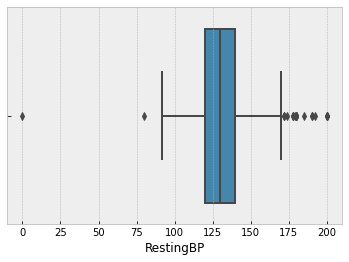

In [20]:
sns.boxplot(df['RestingBP'])

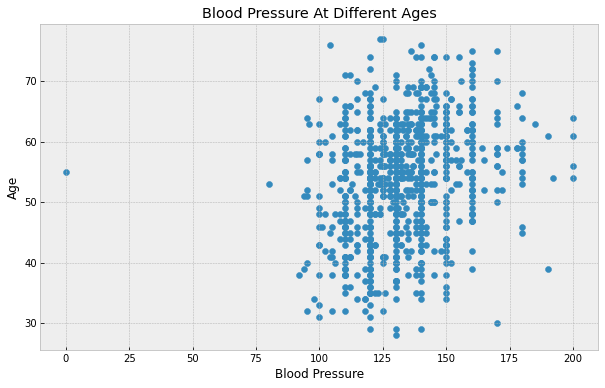

In [21]:
# Show Blood Pressure At Different Ages
plt.figure(figsize=(10, 6))
plt.scatter(df['RestingBP'], df['Age'])
plt.title('Blood Pressure At Different Ages')
plt.xlabel('Blood Pressure')
plt.ylabel('Age')
plt.show()

In [22]:
# Observations which have 0
df[df['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,1,2,0,0,0,Normal,155,N,1.5,Flat,1


In [23]:
# drop index number 449
df.drop(index=449, inplace=True)

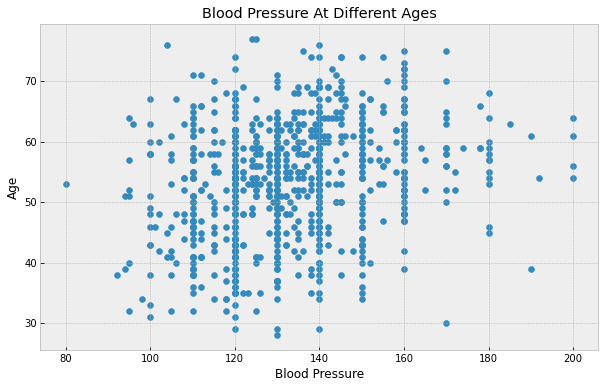

In [24]:
# Show Blood Pressure At Different Ages
plt.figure(figsize=(10, 6))
plt.scatter(df['RestingBP'], df['Age'])
plt.title('Blood Pressure At Different Ages')
plt.xlabel('Blood Pressure')
plt.ylabel('Age')
plt.show()

**Cholesterol Column**

In [25]:
df['Cholesterol'].describe()

count    917.000000
mean     199.016358
std      109.246330
min        0.000000
25%      174.000000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

check outliers

<AxesSubplot:xlabel='Cholesterol'>

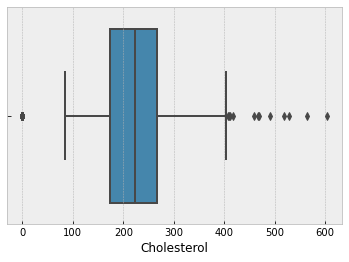

In [26]:
sns.boxplot(df['Cholesterol'])

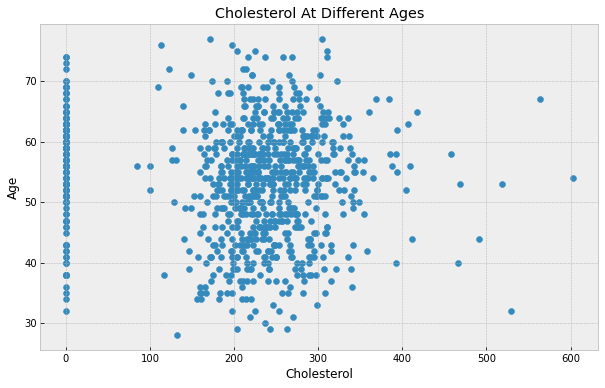

In [27]:
# Show Serum Cholesterol At Different Ages
plt.figure(figsize=(10, 6))
plt.scatter(df['Cholesterol'], df['Age'])
plt.title('Cholesterol At Different Ages')
plt.xlabel('Cholesterol')
plt.ylabel('Age')
plt.show()

In [28]:
# Observations which have 0
df[df['Cholesterol'] == 0]['Cholesterol'].index

Int64Index([293, 294, 295, 296, 297, 298, 299, 300, 301, 302,
            ...
            481, 483, 484, 492, 508, 514, 515, 518, 535, 536],
           dtype='int64', length=171)

In [29]:
zeros = list(df[df['Cholesterol'] == 0]['Cholesterol'].index)
zeros

[293,
 294,
 295,
 296,
 297,
 298,
 299,
 300,
 301,
 302,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 313,
 314,
 315,
 316,
 317,
 318,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 333,
 334,
 335,
 336,
 337,
 338,
 339,
 340,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 350,
 351,
 352,
 353,
 354,
 355,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 363,
 364,
 365,
 366,
 367,
 368,
 369,
 370,
 371,
 372,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 380,
 381,
 382,
 383,
 384,
 385,
 386,
 387,
 388,
 389,
 390,
 391,
 392,
 393,
 394,
 395,
 396,
 397,
 398,
 399,
 400,
 401,
 402,
 403,
 404,
 405,
 406,
 407,
 408,
 409,
 410,
 411,
 412,
 413,
 414,
 415,
 421,
 423,
 424,
 427,
 428,
 429,
 430,
 434,
 435,
 436,
 437,
 438,
 439,
 440,
 441,
 442,
 446,
 450,
 451,
 453,
 455,
 456,
 457,
 458,
 459,
 461,
 463,
 464,
 466,
 467,
 470,
 471,
 472,
 474,
 475,
 477,
 479,
 480,
 481,
 483,
 484,
 492,
 508,
 514

In [30]:
df.drop(labels=zeros, inplace=True)

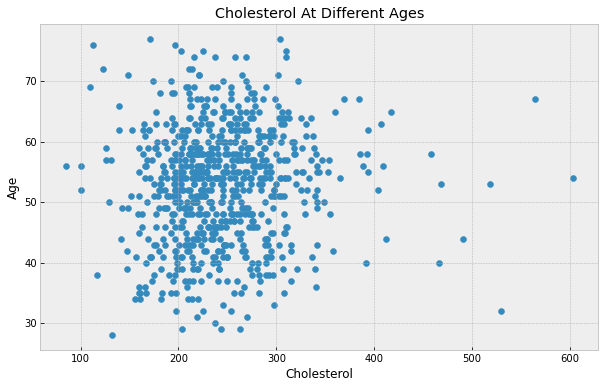

In [31]:
# Show Serum Cholesterol At Different Ages
plt.figure(figsize=(10, 6))
plt.scatter(df['Cholesterol'], df['Age'])
plt.title('Cholesterol At Different Ages')
plt.xlabel('Cholesterol')
plt.ylabel('Age')
plt.show()

- Normal: Less than 200 mg/dL. Borderline high: 200 to 239 mg/dL. High: At or above 240 mg/dL
- Sometimes the cholesterol value can reach 600, but in this case, you need immediate treatment.

In [32]:
# Observation which have cholestrol more value than 400
df[df['Cholesterol'] >= 400]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
28,53,0,1,113,468,0,Normal,127,N,0.0,Up,0
30,53,1,2,145,518,0,Normal,130,N,0.0,Flat,1
69,44,1,0,150,412,0,Normal,170,N,0.0,Up,0
76,32,1,0,118,529,0,Normal,130,N,0.0,Flat,1
103,40,1,0,120,466,1,Normal,152,Y,1.0,Flat,1
149,54,1,0,130,603,1,Normal,125,Y,1.0,Flat,1
182,52,1,0,140,404,0,Normal,124,Y,2.0,Flat,1
250,44,1,0,135,491,0,Normal,135,N,0.0,Flat,1
496,58,1,0,132,458,1,Normal,69,N,1.0,Down,0
616,67,0,2,115,564,0,LVH,160,N,1.6,Flat,0


**FastingBS**

In [33]:
df['FastingBS'].value_counts()

0    621
1    125
Name: FastingBS, dtype: int64

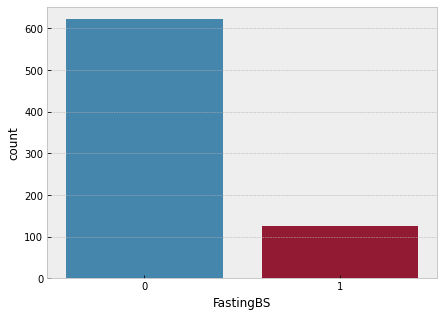

In [34]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='FastingBS')
plt.show()

**RestingECG**

In [35]:
RestingECG = df['RestingECG'].value_counts()
RestingECG

Normal    445
LVH       176
ST        125
Name: RestingECG, dtype: int64

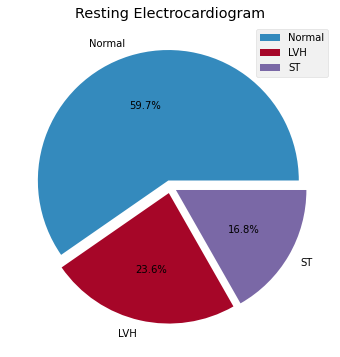

In [36]:
# Show resting electrocardiogram
plt.figure(figsize=(6, 6))
plt.pie(RestingECG, labels=['Normal', 'LVH', 'ST'],
                    autopct='%1.1f%%', shadow=False,
                    explode=[0.05, 0.05, 0.05])
plt.title('Resting Electrocardiogram')
plt.legend()
plt.show()

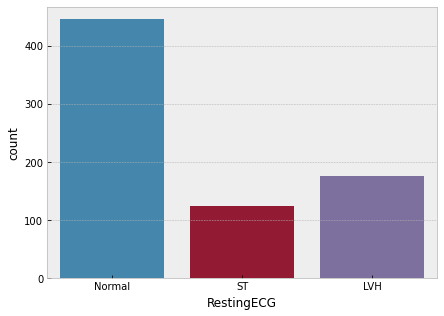

In [37]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='RestingECG')
plt.show()

In [38]:
# Encode RestingECG column
df['RestingECG'] = LabelEncoderModel.fit_transform(df['RestingECG'])

In [39]:
df['RestingECG'].value_counts()

1    445
0    176
2    125
Name: RestingECG, dtype: int64

**MaxHR**

In [40]:
df['MaxHR'].describe()

count    746.000000
mean     140.226542
std       24.524107
min       69.000000
25%      122.000000
50%      140.000000
75%      160.000000
max      202.000000
Name: MaxHR, dtype: float64

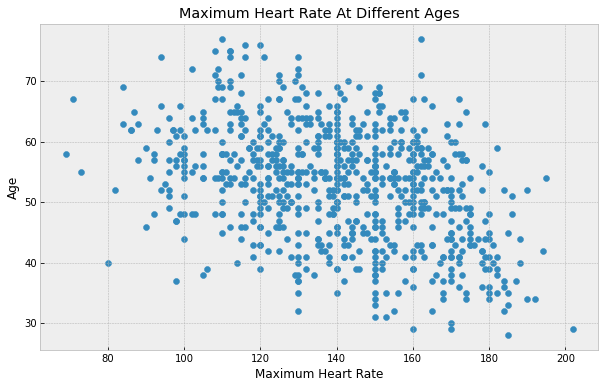

In [41]:
# Show Maximum Heart Rate At Different Ages
plt.figure(figsize=(10, 6))
plt.scatter(df['MaxHR'], df['Age'])
plt.title('Maximum Heart Rate At Different Ages')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Age')
plt.show()

check outliers

<AxesSubplot:xlabel='MaxHR'>

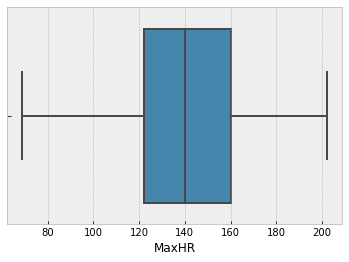

In [42]:
sns.boxplot(df['MaxHR'])

**ExerciseAngina**

In [43]:
df['ExerciseAngina'].value_counts()

N    459
Y    287
Name: ExerciseAngina, dtype: int64

In [44]:
# Encode ExerciseAngina column
df['ExerciseAngina'] = LabelEncoderModel.fit_transform(df['ExerciseAngina'])

In [45]:
df['ExerciseAngina'].value_counts()

0    459
1    287
Name: ExerciseAngina, dtype: int64

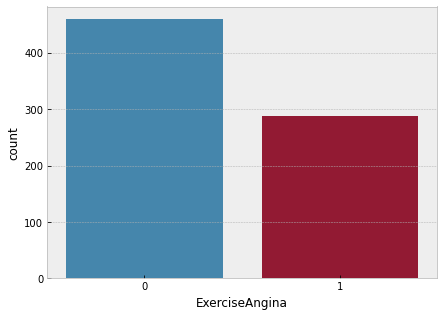

In [46]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='ExerciseAngina')
plt.show()

**Oldpeak**

In [47]:
df['Oldpeak'].describe()

count    746.000000
mean       0.901609
std        1.072861
min       -0.100000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

check outliers

<AxesSubplot:xlabel='Oldpeak'>

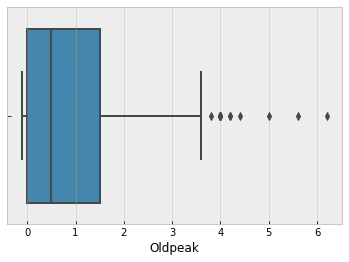

In [48]:
sns.boxplot(df['Oldpeak'])

**ST_Slope**

In [49]:
df['ST_Slope'].value_counts()

Flat    354
Up      349
Down     43
Name: ST_Slope, dtype: int64

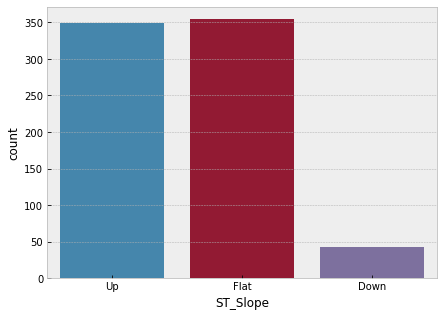

In [50]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='ST_Slope')
plt.show()

In [51]:
# Encode ST_Slope column
df['ST_Slope'] = LabelEncoderModel.fit_transform(df['ST_Slope'])

In [52]:
df['ST_Slope'].value_counts()

1    354
2    349
0     43
Name: ST_Slope, dtype: int64

<AxesSubplot:>

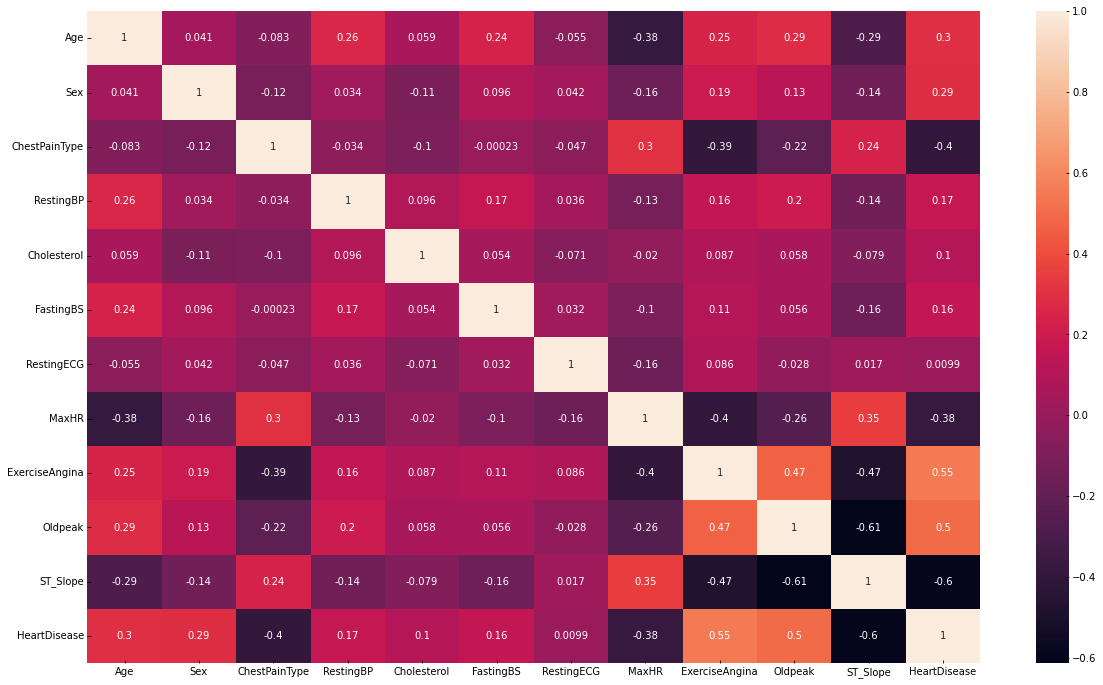

In [53]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True)

**Bivariate Analysis**

In [54]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

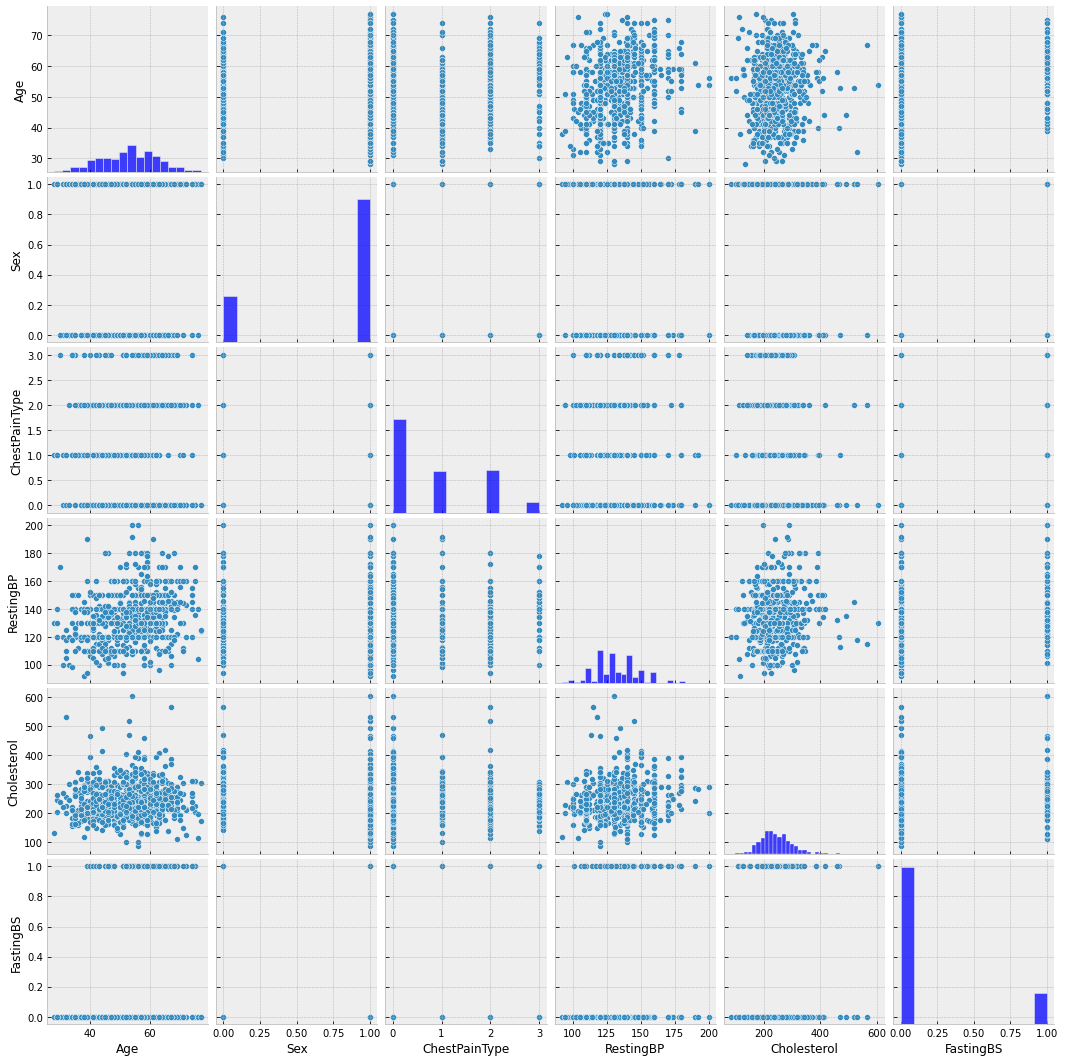

In [55]:
sns.pairplot(df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS']])

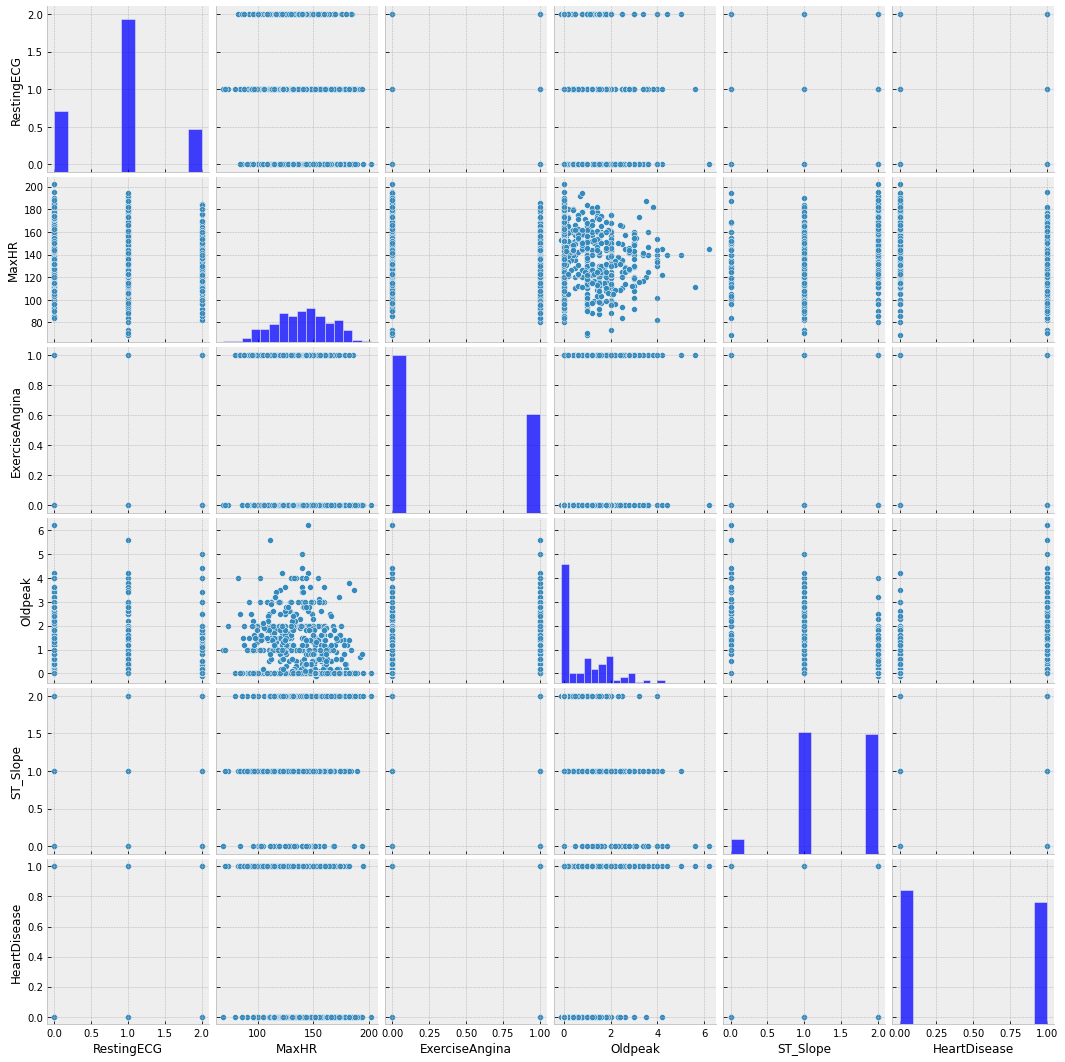

In [56]:
sns.pairplot(df[['RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope','HeartDisease']])

# Machine Learning Model

In [57]:
# Divide data into dependent and independent
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [58]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [59]:
# Scaling Model
from sklearn.preprocessing import StandardScaler
StandardScalerModel = StandardScaler()
X = StandardScalerModel.fit_transform(X)

In [60]:
X

array([[-1.35607325,  0.56806253,  0.1665881 , ..., -0.79074163,
        -0.84094155,  0.9868448 ],
       [-0.40865641, -1.76036959,  1.21091347, ..., -0.79074163,
         0.0917709 , -0.6863057 ],
       [-1.67187886,  0.56806253,  0.1665881 , ..., -0.79074163,
        -0.84094155,  0.9868448 ],
       ...,
       [ 0.43349189,  0.56806253, -0.87773728, ...,  1.26463557,
         0.27831339, -0.6863057 ],
       [ 0.43349189, -1.76036959,  0.1665881 , ..., -0.79074163,
        -0.84094155, -0.6863057 ],
       [-1.56661032,  0.56806253,  1.21091347, ..., -0.79074163,
        -0.84094155,  0.9868448 ]])

In [61]:
# Splitting Model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [62]:
from sklearn.metrics import classification_report

## Logistic Regression

In [63]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
LogisticRegressionModel = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=100)
LogisticRegressionModel.fit(X_train, y_train)

LogisticRegression()

In [64]:
# Score of model
print('Score of train data = ', round(LogisticRegressionModel.score(X_train, y_train), 4))
print('Score of test data = ', round(LogisticRegressionModel.score(X_test, y_test), 4))

Score of train data =  0.854
Score of test data =  0.8733


In [65]:
preds = LogisticRegressionModel.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88        78
           1       0.86      0.88      0.87        72

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150



## SVC

In [66]:
# SVC Model
from sklearn.svm import SVC
SVCModel = SVC(C=0.5, kernel='rbf')
SVCModel.fit(X_train, y_train)

SVC(C=0.5)

In [67]:
# Score of model
print('Score of train data = ', round(SVCModel.score(X_train, y_train), 4))
print('Score of test data = ', round(SVCModel.score(X_test, y_test), 4))

Score of train data =  0.8909
Score of test data =  0.86


In [68]:
preds = SVCModel.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        78
           1       0.83      0.89      0.86        72

    accuracy                           0.86       150
   macro avg       0.86      0.86      0.86       150
weighted avg       0.86      0.86      0.86       150



## Naive Bayes

In [69]:
from sklearn.naive_bayes import GaussianNB
GNBC = GaussianNB()
GNBC.fit(X_train, y_train)

GaussianNB()

In [70]:
# Score of model
print('Score of train data = ', round(GNBC.score(X_train, y_train), 4))
print('Score of test data = ', round(GNBC.score(X_test, y_test), 4))

Score of train data =  0.8423
Score of test data =  0.88


In [71]:
preds = GNBC.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        78
           1       0.90      0.85      0.87        72

    accuracy                           0.88       150
   macro avg       0.88      0.88      0.88       150
weighted avg       0.88      0.88      0.88       150



## Decision Tree Classifier

In [72]:
# Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifierModel = DecisionTreeClassifier()
DecisionTreeClassifierModel.fit(X_train, y_train)

DecisionTreeClassifier()

In [73]:
# Score of model
print('Score of train data = ', round(DecisionTreeClassifierModel.score(X_train, y_train), 4))
print('Score of test data = ', round(DecisionTreeClassifierModel.score(X_test, y_test), 4))

Score of train data =  1.0
Score of test data =  0.8


In [74]:
preds = DecisionTreeClassifierModel.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        78
           1       0.78      0.82      0.80        72

    accuracy                           0.80       150
   macro avg       0.80      0.80      0.80       150
weighted avg       0.80      0.80      0.80       150



## Random Forest Classifier

In [75]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifierModel = RandomForestClassifier(n_estimators=10, criterion='entropy')
RandomForestClassifierModel.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [76]:
# Score of model
print('Score of train data = ', round(RandomForestClassifierModel.score(X_train, y_train), 4))
print('Score of test data = ', round(RandomForestClassifierModel.score(X_test, y_test), 4))

Score of train data =  0.995
Score of test data =  0.84


In [77]:
preds = RandomForestClassifierModel.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        78
           1       0.83      0.83      0.83        72

    accuracy                           0.84       150
   macro avg       0.84      0.84      0.84       150
weighted avg       0.84      0.84      0.84       150



## K-Neighbors Classifier

In [78]:
# K-Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifierModel = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
KNeighborsClassifierModel.fit(X_train, y_train)

KNeighborsClassifier()

In [79]:
# Score of model
print('Score of train data = ', round(KNeighborsClassifierModel.score(X_train, y_train), 4))
print('Score of test data = ', round(KNeighborsClassifierModel.score(X_test, y_test), 4))

Score of train data =  0.8909
Score of test data =  0.86


In [80]:
preds = KNeighborsClassifierModel.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87        78
           1       0.86      0.85      0.85        72

    accuracy                           0.86       150
   macro avg       0.86      0.86      0.86       150
weighted avg       0.86      0.86      0.86       150



## XGBoosting

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
XGBoost = GradientBoostingClassifier()
XGBoost.fit(X_train, y_train)

GradientBoostingClassifier()

In [82]:
# Score of model
print('Score of train data = ', round(XGBoost.score(X_train, y_train), 4))
print('Score of test data = ', round(XGBoost.score(X_test, y_test), 4))

Score of train data =  0.9681
Score of test data =  0.8533


In [83]:
preds = XGBoost.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        78
           1       0.84      0.86      0.85        72

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



**Summary**

according to the preveous models:
> Gaussian Naive Baise Model has the best accurecy = 88
.so i will predict the  test data

In [85]:
y_pred = GNBC.predict(X_test)

In [86]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [87]:
# Confusion Metric
from sklearn.metrics import confusion_matrix
ConfusionMetricModel = confusion_matrix(y_test, y_pred)

In [88]:
len(X_test)

150

In [89]:
ConfusionMetricModel

array([[71,  7],
       [11, 61]], dtype=int64)

Text(72.5, 0.5, 'Truth')

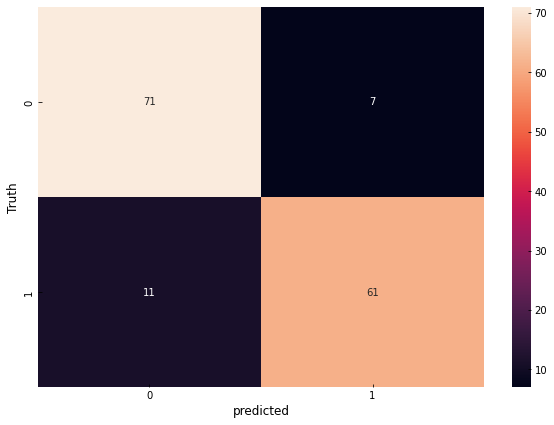

In [90]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True)
plt.xlabel('predicted')
plt.ylabel('Truth')